In [1]:
from girlsday import *

100%|██████████| 5/5 [00:07<00:00,  2.04s/it]

## 1) Clean map of the Earth

Below you can simply load and plot a map of the earth where the colorscale highlights the elevation above sea level.

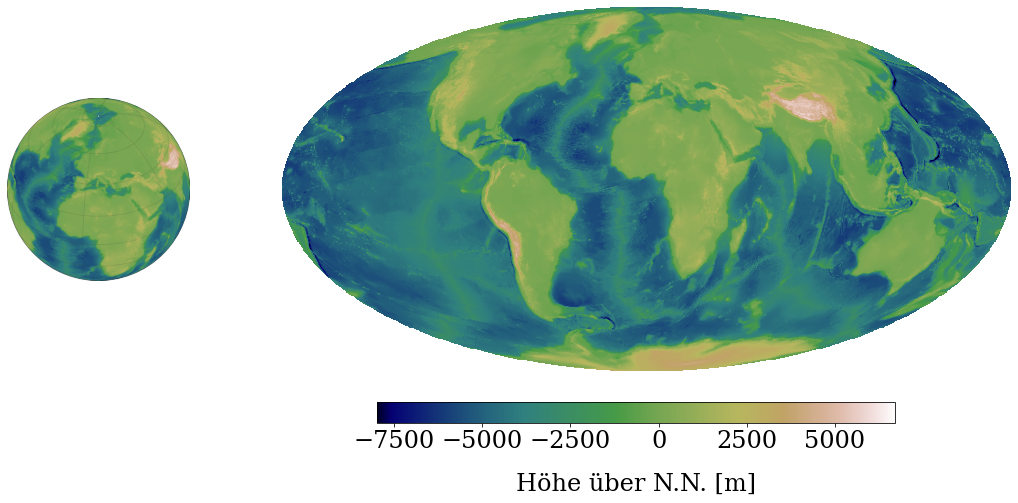

In [2]:
#plotEarth3d(mollview,cartview)
plotEarth3d(mollview,earth3d)

## 2) Take only scales $\ell \leq \ell_\text{max}$


Visualisation of the effect of taking only certain scales. Therefore calculate first the decomposition into spherical harmonics using healpy. This allows for specifying already the maximum scale ($\ell_\text{max}$). 

Then reconstruct the map using the ($a_{\ell m}$ with $\ell \leq \ell_\text{max}$) and plot together with the powerspectrum where the selected range is highlighted.

In [3]:
widgets.interact(plotAlmMap, LMAX=int_wdgt)

interactive(children=(IntSlider(value=1, description='$\\ell_\\text{max}$:', layout=Layout(width='90%'), max=2…

<function girlsday.plotAlmMap(LMAX)>

## 3) Visualisation of mode hierarchy 


This plot intends to make the connection between scales and modes clearer. Furthermore it should transport a better intuition for the role of spherical harmonics as basis functions (i.e. even though one mode doesn't quite look like the signal, the sum of them actually does if enough modes are included). 

 89%|████████▉ | 8/9 [00:10<00:01,  1.77s/it]

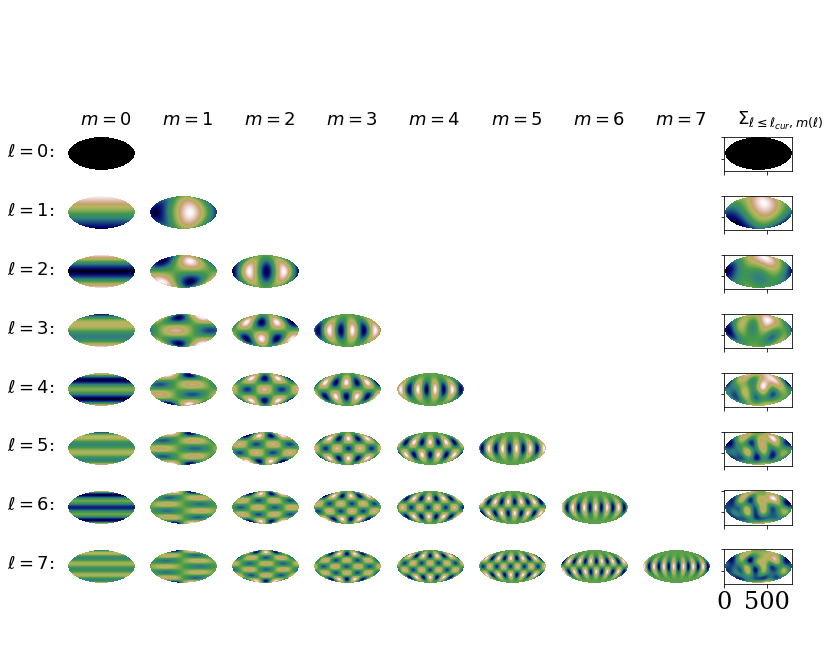

In [4]:
triangularPlot()

In [5]:
widgets.VBox([widgets.HBox([check_l0, check_l1,check_l2,check_l3,check_l4]), out1])

In [6]:
widgets.VBox([widgets.VBox([check_l0, widgets.HBox([check_l1m0, check_l1m1]),widgets.HBox([check_l2m0, check_l2m1,check_l2m2]),widgets.HBox([check_l3m0, check_l3m1,check_l3m2, check_l3m3])]), out2], layout=widgets.Layout(width='130%'))

 75%|███████▌  | 3/4 [06:03<02:01, 121.14s/it]
9it [00:48,  5.38s/it]
 75%|███████▌  | 3/4 [00:01<00:00,  1.91it/s]

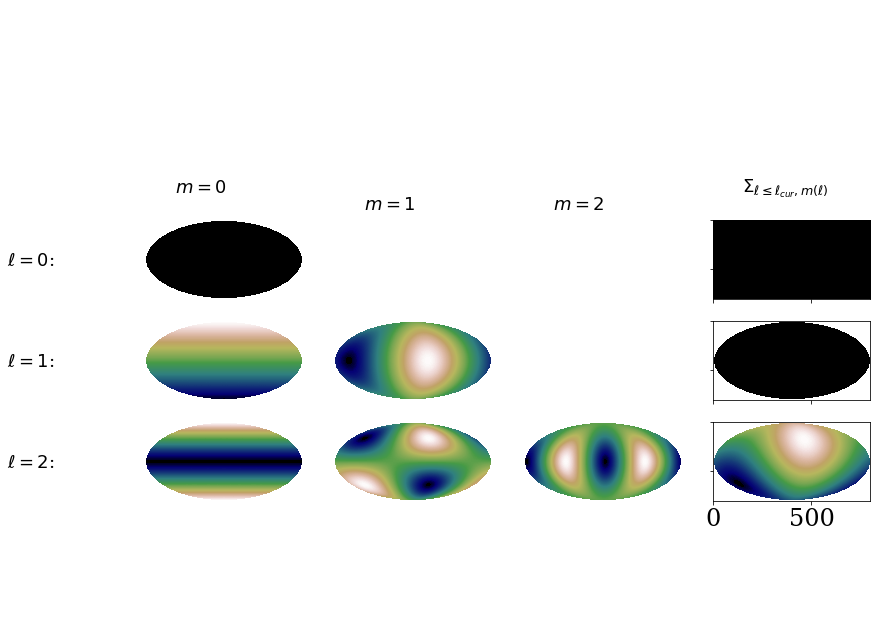

In [49]:
maxL_new = 3

mapCur = np.loadtxt("data/triangular00.dat")
shapeSummedMaps = np.append(maxL_new,np.shape(mapCur))
summedMaps = np.zeros(shapeSummedMaps)

fig, axes = plt.subplots(figsize=(13, 13), sharex=True, sharey=True, ncols=maxL_new+1, nrows=maxL_new)
fig.subplots_adjust(hspace = -0.8)
mapCur = np.loadtxt("data/triangular00.dat")

shapeMapArray = np.append([maxL_new,maxL_new],np.shape(mapCur))
mapArray = np.zeros(shapeMapArray)

pbarTriang = tqdm(total=maxL_new+1, position=0, leave=True)
for i in range(maxL_new):
    summedMapsCur = np.zeros_like(mapCur)
    for j in range(maxL_new):
        if i<j:
            if(i==0):
                axes[i, j].text(leftMarginM,topMargMfollow,"$m=%d$"%j,size=18)
            axes[i, j].axis('off')
        else:
            mapCur = np.loadtxt("data/triangular%d%d.dat"%(i,j)) 
            if(i==0):
                axes[i, j].text(leftMarginM,topMargMfirst,"$m=%d$"%j,size=18)
            axes[i, j].imshow(mapCur,cmap="gist_earth")
            axes[i, j].axis('off')
            if(j==0):
                axes[i, j].text(leftMarginEll,230,"$\ell=%d$:"%i,size=18)
            mapArray[i,j] = mapCur
    pbarTriang.update(1)
    
    
axes[0, maxL_new].text(leftMarginM,topMargMfirst,r"$\Sigma_{\ell\leq\ell_{cur},m(\ell)}$",size=18)
for curL in range(maxL_new):
    curSummedMap = np.zeros_like(mapArray[0,0])
    for j in range(curL):
        curSummedMap += np.sum(mapArray[j],axis=0)
    
    axes[curL, maxL_new].imshow(curSummedMap,cmap='gist_earth')

In [ ]:
plotEarth(summedMapsCur)

# 4) CMB map

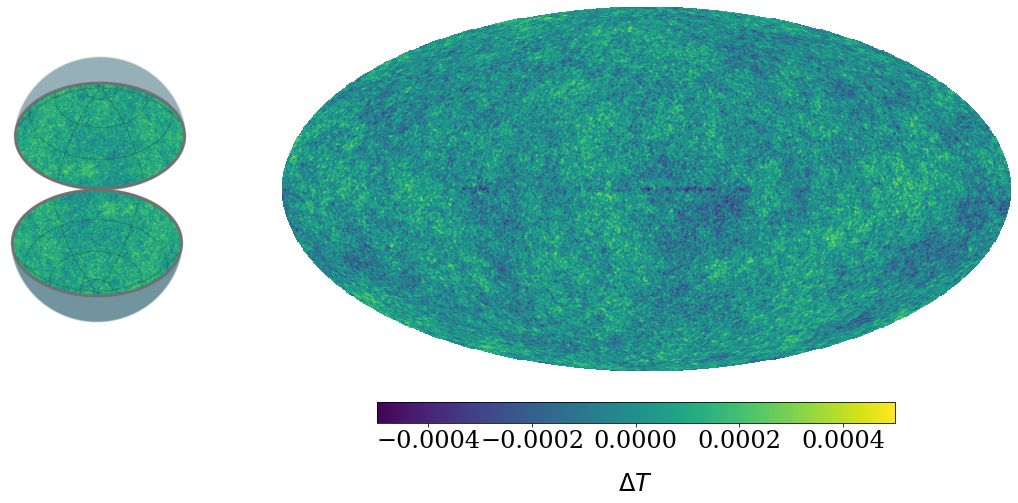

In [5]:
plotCMB3d(CMBmollview,cmb3d)

In [4]:
widgets.interact(plotAlmMapCMB, LMAX=int_wdgtCMB)


interactive(children=(IntSlider(value=116, description='$\\ell_\\text{max}$:', layout=Layout(width='90%'), max…

<function girlsday.plotAlmMapCMB(LMAX)>

## 5) Get Atom density from the CMB 

In [5]:
widgets.interact(plotCMBps, oBarPercent=int_wdgtPowerSpec)

interactive(children=(FloatSlider(value=0.2, description='Atome [in %]:', layout=Layout(width='90%'), max=20.0…

<function girlsday.plotCMBps(oBarPercent)>

# A) To Do

- <span style="color:red;font-weight:bold">Important</span>: When I tried it didn't work on binder, since they (understandably) don't have healpy; either there is a way to locally include healpy to the github/binder-repository or we might need to figure out a plan B how they can run the notebook remotely
- make notebook as clear and unserfriendly as possible (i.e. adjust sizes of plots etc.)
- Maybe add generation of CMB maps from power spectrum with changed $\Omega_\mathrm{bar}$

# B) Questions


- is the gray shaded region in the C_l plot actually transporting what we want to transport, i.e. that this region is excluded?
- is part 3) helpful?

# C) Ideas


1) 